In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from re import sub
import datetime as dt
df = pd.read_excel('Downloads/Data2.xls')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05 00:00:00,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04 00:00:00,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

1. Explain about the data, the key factors:
- How many records, what are the records about
- factors of the dataset => who are the customers 

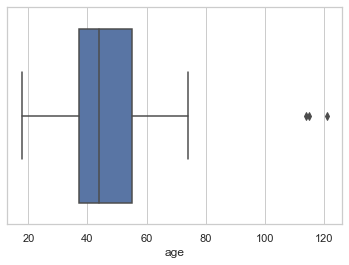

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df["age"])

(0.0, 200000.0)

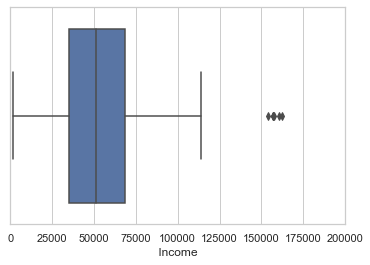

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df[' Income '])
plt.xlim(0,200000)

In [7]:
import numpy as np
bins = [0, 40, 50, 60, 100]
label = ['Under 40', '40 To 50', '50 to 60', 'above 60']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=label)

<AxesSubplot:ylabel='None'>

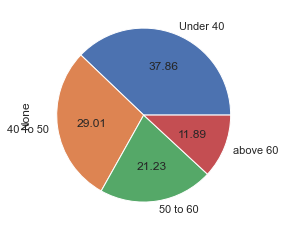

In [8]:
df.groupby('agegroup').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

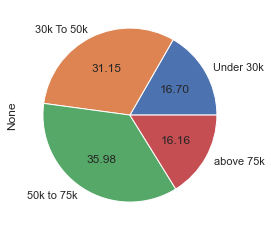

In [9]:
bins = [0, 30000, 50000, 75000, 200000]
label = ['Under 30k', '30k To 50k', '50k to 75k', 'above 75k']
df['incomegroup'] = pd.cut(df[' Income '], bins=bins, labels=label)
df.groupby('incomegroup').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

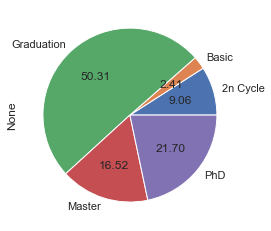

In [51]:
df.groupby('Education').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

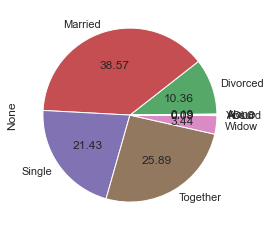

In [52]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

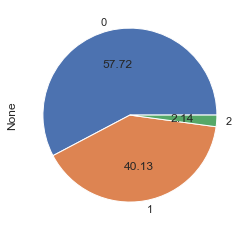

In [53]:
df.groupby('Kidhome').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

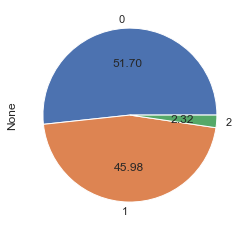

In [54]:
df.groupby('Teenhome').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

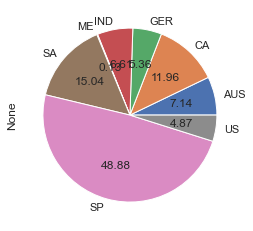

In [58]:
df.groupby('Country').size().plot(kind='pie', autopct='%.2f')

2. Processing Data 
2a. Cleaning:
- Removing string characters to make Income Columns to numeric values 
- Convert Dt_Customer to datetime values 
- Convert numeric values to its format
2b. Adding some important metrics
- Age: Assume that the time this report needed to be made was the end of the year max in the dataset, 2014, so age of customers will be 2014 substract the year born 
- Categorise the age and in come to groups:

label = ['Under 30k', '30k To 50k', '50k to 75k', 'above 75k']

label = ['Under 40', '40 To 50', '50 to 60', 'above 60']
- total_numpurchase: Total number of purchasing 
- total_spending: Total amount has spent in the last 2 years
- average_pertime: Average amount they spent per purchase time
- frequency : How often in average a customer makes a purchase (days)

In [ ]:
df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"])
df['age'] = 2014 - df['Year_Birth']

df[' Income '] = df[' Income '].str.replace('$','', regex=True)
df[' Income '] = df[' Income '].str.replace(' ','', regex=True)
df[' Income '] = df[' Income '].str.replace(',','', regex=True)
df[' Income '] = pd.to_numeric(df[' Income '])


df['total_numpurchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+df['MntSweetProducts'] + df['MntGoldProds']
    
df['average_pertime'] = df['total_spending']/df['total_numpurchase']
df['frequency'] = (pd.to_datetime(df['Dt_Customer'].max()) - pd.to_datetime(df["Dt_Customer"])).astype('timedelta64[D]')

In [58]:
for i in ['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] :
    df[i] = pd.to_numeric(df[i])

3. Exploretory Analysis 


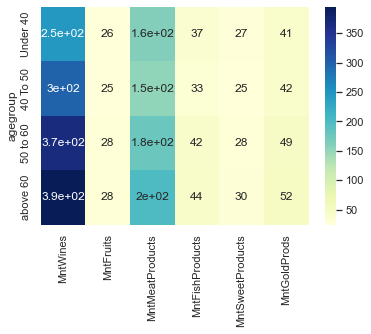

In [56]:
age_spending = df[['agegroup', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby(['agegroup']).mean() 
ax = sns.heatmap(age_spending, cmap="YlGnBu", annot=True)

# At which age group, which kind of products are consume the most. (The average values that customers in 
# in each age group spend on each products category 

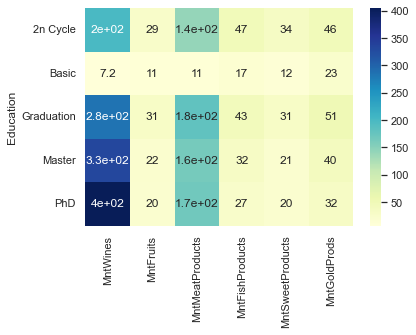

In [61]:
education_spending = df[['Education', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby(['Education']).mean()
ax = sns.heatmap(education_spending, cmap="YlGnBu", annot = True)

# At which education group, which kind of products are consume the most. (The average values that customers in 
# in each education group spend on each products category 

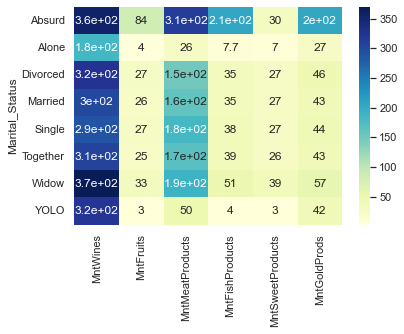

In [62]:
marital_spending = df[['Marital_Status', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby(['Marital_Status']).mean()
ax = sns.heatmap(marital_spending, cmap="YlGnBu", annot = True)

# At which marriage group, which kind of products are consume the most. (The average values that customers in 
# in each marriage group spend on each products category 

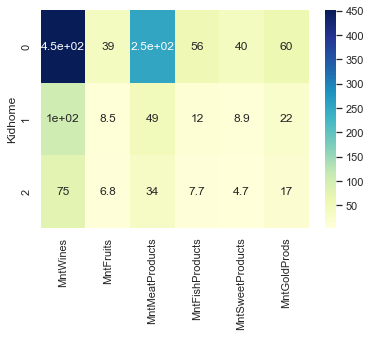

In [63]:
# 'Kidhome', 'Teenhome',
child_spending = df[['Kidhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby(['Kidhome']).mean()
ax = sns.heatmap(child_spending, cmap="YlGnBu", annot = True)

# How customers with kids shops (The average values that customers who have 0, 1 or 2 kids group spend on each products category 

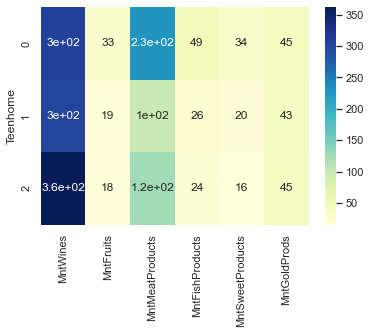

In [65]:
teen_spending = df[['Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby(['Teenhome']).mean()
ax = sns.heatmap(teen_spending, cmap="YlGnBu", annot = True)
# How customers with teens shops (The average values that 
# customers who have 0, 1 or 2 teens group spend on each products category 

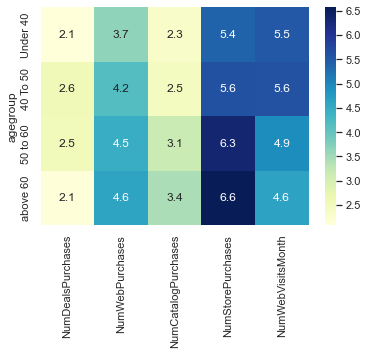

In [57]:
age_shoppinghabit = df[['agegroup', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(['agegroup']).mean()

ax = sns.heatmap(age_shoppinghabit, cmap="YlGnBu", annot=True)

# At which age group, what is their shopping behaviour. (The average time that customers in 
# in each age group shopping at which way

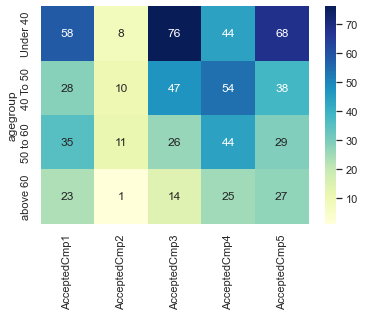

In [59]:
age_camp = df[['agegroup', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby(['agegroup']).sum()
ax = sns.heatmap(age_camp, cmap="YlGnBu", annot=True)
# At which age group, which campage got them. (Total number of customers at each age group each campange
#  got 


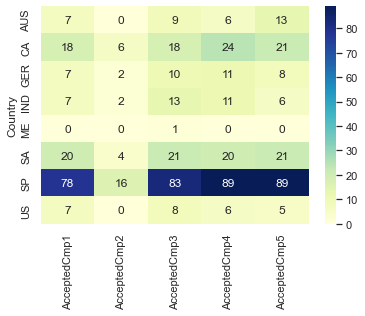

In [60]:
country_camp = df[['Country', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby(['Country']).sum()
ax = sns.heatmap(country_camp, cmap="YlGnBu", annot=True)
# At which country, which campage got them. (Total number of customers at each country each campange
#  got 



4. Customer Segmentation base on Recency, Frequency and Moneytary values 

In [36]:
#Buliding RFM segments
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(df['Recency'], q = 4, labels = r_labels)
df = df.assign(R =r_quartiles.values)
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(df['frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(df['total_spending'], q = 4, labels = m_labels)
df = df.assign(F =f_quartiles.values)
df = df.assign(M =m_quartiles.values)

In [39]:
#Build RMF segment and RMF score
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df['RFM_Segment'] = df.apply(join_rfm, axis = 1)
df['RFM_Score'] = df[['R','F','M']].sum(axis = 1)

In [41]:
#Analysing RMF table
df.groupby('RFM_Segment').size().sort_values(ascending = False)[:10]

RFM_Segment
311    56
411    54
111    53
244    51
344    48
144    47
233    47
423    45
211    45
222    44
dtype: int64

In [44]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
df['RFM_Level'] = df.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spending,average_pertime,mean_spending,frequency,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1190,85.000000,NaN,173.0,4,1,4,414,9,Middle
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,577,33.941176,NaN,174.0,4,1,3,413,8,Middle
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,251,25.100000,NaN,207.0,4,1,2,412,7,Middle
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,11,3.666667,NaN,31.0,4,1,1,411,6,Middle
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,91,15.166667,NaN,124.0,4,1,2,412,7,Middle


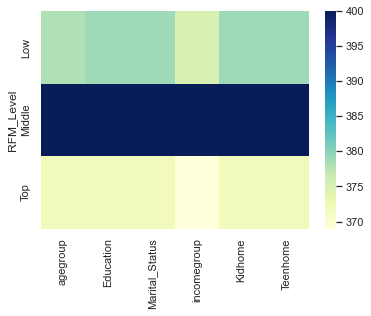

In [49]:
segmentation = df[['RFM_Level', 'agegroup',
       'Education', 'Marital_Status', 'incomegroup', 'Kidhome',
       'Teenhome']].groupby(['RFM_Level']).count()

ax = sns.heatmap(segmentation, cmap="YlGnBu", vmax=400)

In [50]:
top = df.loc[df['RFM_Level'] == 'Top']